In [7]:
import numpy as np
import cv2
import time
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
import matplotlib.pyplot as plt

In [93]:
image_path = "C:/Users/Assus/Desktop/8qXVwlm9eGQ_90_97_87.jpg"

In [147]:
image = cv2.imread(image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [148]:
edges = canny(grayscale, sigma=2, low_threshold=20, high_threshold=100)

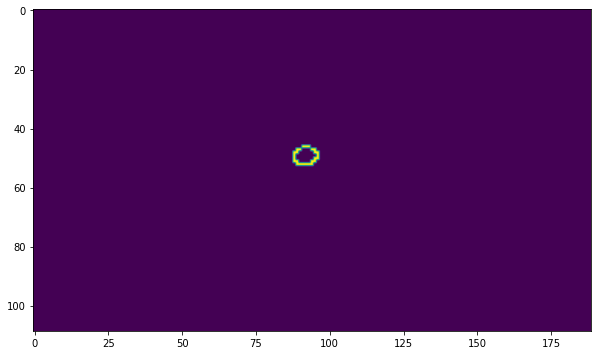

In [149]:
figure = plt.figure(figsize=(10,7))
plt.imshow(edges)

In [143]:
result = hough_ellipse(edges, accuracy=80, threshold=10, min_size=3, max_size=50)

In [144]:
result

array([(12, 47.5, 91.5, 0.        , 3.53553391, 2.9996956 ),
       (12, 47.5, 92.5, 3.53553391, 0.        , 1.71269338),
       (12, 48. , 92. , 4.        , 0.        , 1.57079633),
       (12, 48. , 91.5, 0.        , 3.64005494, 2.86329299),
       (12, 48.5, 91.5, 0.        , 3.53553391, 2.9996956 ),
       (17, 48.5, 92. , 0.        , 4.03112887, 3.01723766),
       (13, 48. , 92.5, 3.64005494, 0.        , 1.84909599),
       (18, 48.5, 92. , 4.03112887, 0.        , 1.69515132),
       (14, 49. , 92. , 4.        , 0.        , 1.57079633),
       (13, 48.5, 91. , 0.        , 3.35410197, 2.67794504),
       (15, 48.5, 91.5, 0.        , 3.80788655, 2.73670087),
       (17, 49. , 91.5, 0.        , 3.64005494, 2.86329299),
       (18, 49. , 92. , 0.        , 4.12310563, 2.89661399),
       (18, 49.5, 92. , 0.        , 4.03112887, 3.01723766),
       (13, 48.5, 92. , 3.35410197, 0.        , 2.03444394),
       (18, 49. , 91.5, 3.64005494, 0.        , 1.84909599),
       (11, 49. , 92. , 

In [145]:
result.sort(order='accumulator')
# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

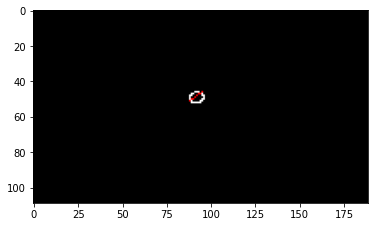

In [146]:
plt.imshow(edges)

In [30]:
gaussianBlur = cv2.GaussianBlur(image, (3, 3), 0)


In [33]:
canny_cv = cv2.Canny(gaussianBlur, 0, 150)

In [34]:
cv2.imshow("image", image)
cv2.imshow('edge', canny_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
video = "../Dataset/8qXVwlm9eGQ/337_342.mp4"

In [4]:
vidCap = cv2.VideoCapture(video)

In [5]:
while True:
    ret, frame = vidCap.read()
    if ret is False:
        break
    print(frame)
    grayScale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussianBlur = cv2.GaussianBlur(grayScale, (9, 9), 0)
    """
    edges = canny(gaussianBlur, sigma=2.0, low_threshold=0.55, high_threshold=0.8)
    print("Canny Edge")
    result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=5, max_size=10)
    print("Hough ellipse")
    
    result.sort(order='accumulator')
    best = list(result[-1])
    yc, xc, a, b = [int(round(x)) for x in best[1:5]]
    orientation = best[5]

    # Draw the ellipse on the original image
    cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
    image_rgb[cy, cx] = (0, 0, 255)
    # Draw the edge (white) and the resulting ellipse (red)
    edges = color.gray2rgb(img_as_ubyte(edges))
    edges[cy, cx] = (250, 0, 0)
    
    cv2.imshow("edges", edges)
    time.sleep(0.5)
    """
    circles = cv2.HoughCircles(gaussianBlur, cv2.HOUGH_GRADIENT, 1, 100, param1=2, param2=4, minRadius=0, maxRadius=5)
    if (circles is None):
        #cv2.imshow("frame", gaussianBlur)
        #time.sleep(0.5)
        continue
    circles = np.uint16(np.around(circles))

    for i in circles[0, :]:
        cv2.circle(gaussianBlur, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(gaussianBlur,(i[0],i[1]),2,(0,0,255),3)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

    cv2.imshow("frame", gaussianBlur)
    time.sleep(0.5)


[[[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 [[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 [[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 ...

 [[167 143 145]
  [167 143 145]
  [167 143 145]
  ...
  [182 150 156]
  [182 150 156]
  [ 85  53  59]]

 [[170 146 148]
  [170 146 148]
  [170 146 148]
  ...
  [179 147 153]
  [179 147 153]
  [ 83  51  57]]

 [[170 146 148]
  [170 146 148]
  [170 146 148]
  ...
  [179 147 153]
  [179 147 153]
  [ 83  51  57]]]
[[[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 [[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 [[  8   3   4]
  [  8   3   4]
  [  8   3   4]
  ...
  [  8   3   2]
  [  8   3   2]
  [  8   3   2]]

 ...

 [[167 143 145]
  [167 143 145]
  [167 143 145]
  ..

[[[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 26  35  16]
  [ 24  33  14]
  [ 24  33  14]]

 [[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 28  37  18]
  [ 27  36  17]
  [ 27  36  17]]

 [[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 30  38  21]
  [ 30  38  21]
  [ 29  37  20]]

 ...

 [[ 97  81  86]
  [ 97  81  86]
  [ 97  81  86]
  ...
  [175 151 165]
  [177 153 167]
  [ 84  60  74]]

 [[ 97  81  86]
  [ 97  81  86]
  [ 97  81  86]
  ...
  [175 151 165]
  [177 153 167]
  [ 84  60  74]]

 [[ 97  81  86]
  [ 97  81  86]
  [ 97  81  86]
  ...
  [175 151 165]
  [177 153 167]
  [ 84  60  74]]]
[[[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 31  40  21]
  [ 31  40  21]
  [ 29  38  19]]

 [[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 34  43  24]
  [ 34  43  24]
  [ 33  42  23]]

 [[ 10   3   0]
  [ 10   3   0]
  [ 10   3   0]
  ...
  [ 36  44  27]
  [ 36  44  27]
  [ 35  43  26]]

 ...

 [[ 97  81  86]
  [ 97  81  86]
  [ 97  81  86]
  ..

KeyboardInterrupt: 